In [2]:
!pip install kafka-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.5/246.5 kB 3.1 MB/s eta 0:00:00


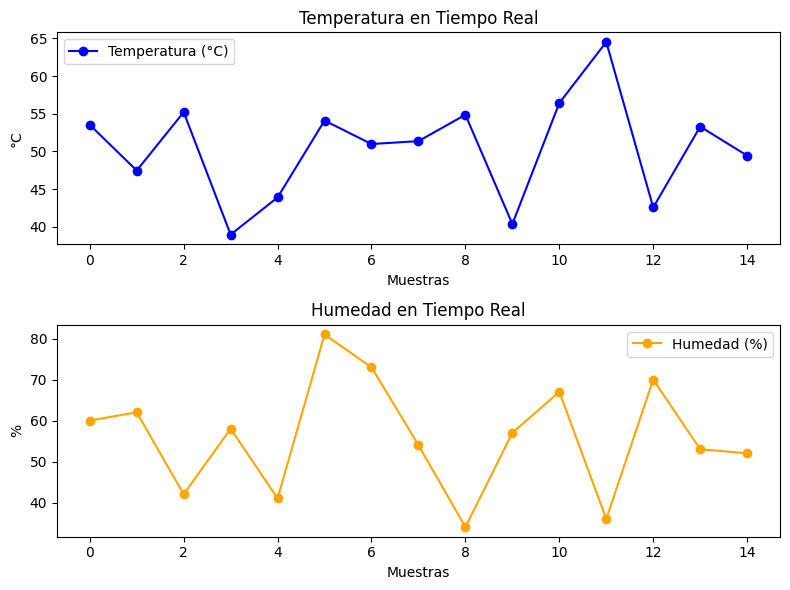

Proceso detenido por el usuario.
Generando GIF...
GIF guardado como grafico_animado.gif
Consumer finalizado.


In [25]:
from kafka import KafkaConsumer
import json
import matplotlib.pyplot as plt
from IPython import display
from PIL import Image
import glob
import os

# Configuración del Consumer
consumer = KafkaConsumer(
    '21600',  # Reemplaza con el número de carné
    group_id='S21600',
    bootstrap_servers='164.92.76.15:9092',
    value_deserializer=lambda x: json.loads(x.decode('utf-8')),
    key_deserializer=lambda k: k.decode('utf-8') if k else None,
    auto_offset_reset='earliest'
)

temperaturas = []
humedades = []
log_file = "log.txt"
image_folder = "frames"
os.makedirs(image_folder, exist_ok=True)  # Crear carpeta para las imágenes

print("Iniciando el consumer y esperando mensajes...")

try:
    frame_count = 0  # Contador para las imágenes

    for mensaje in consumer:
        # Extraer datos del mensaje
        data = mensaje.value
        temperaturas.append(data['temperatura'])
        humedades.append(data['humedad'])

        # Guardar en el archivo de log
        with open(log_file, "a") as f:
            f.write(f"Mensaje recibido: Clave={mensaje.key}, Valor={data}\n")

        # Limpiar la salida anterior para evitar superposiciones
        display.clear_output(wait=True)

        # Crear el gráfico
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

        # Gráfico de temperatura
        ax1.plot(temperaturas, label="Temperatura (°C)", marker='o', color='b')
        ax1.set_title("Temperatura en Tiempo Real")
        ax1.set_xlabel("Muestras")
        ax1.set_ylabel("°C")
        ax1.legend()

        # Gráfico de humedad
        ax2.plot(humedades, label="Humedad (%)", marker='o', color='orange')
        ax2.set_title("Humedad en Tiempo Real")
        ax2.set_xlabel("Muestras")
        ax2.set_ylabel("%")
        ax2.legend()

        # Guardar el gráfico como imagen
        frame_path = f"{image_folder}/frame_{frame_count:03d}.png"
        plt.savefig(frame_path)
        frame_count += 1

        # Mostrar el gráfico en Colab
        plt.tight_layout()
        plt.show()

except KeyboardInterrupt:
    print("Proceso detenido por el usuario.")
finally:
    # Crear el GIF a partir de las imágenes guardadas
    print("Generando GIF...")
    frames = [Image.open(image) for image in sorted(glob.glob(f"{image_folder}/frame_*.png"))]
    gif_path = "grafico_animado.gif"
    frames[0].save(gif_path, format="GIF", append_images=frames[1:], save_all=True, duration=500, loop=0)
    print(f"GIF guardado como {gif_path}")
    print("Consumer finalizado.")
